In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score,roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes_data_upload.csv')

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

## Checking missing values

In [5]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [6]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

### Exploratory Data Analysis 

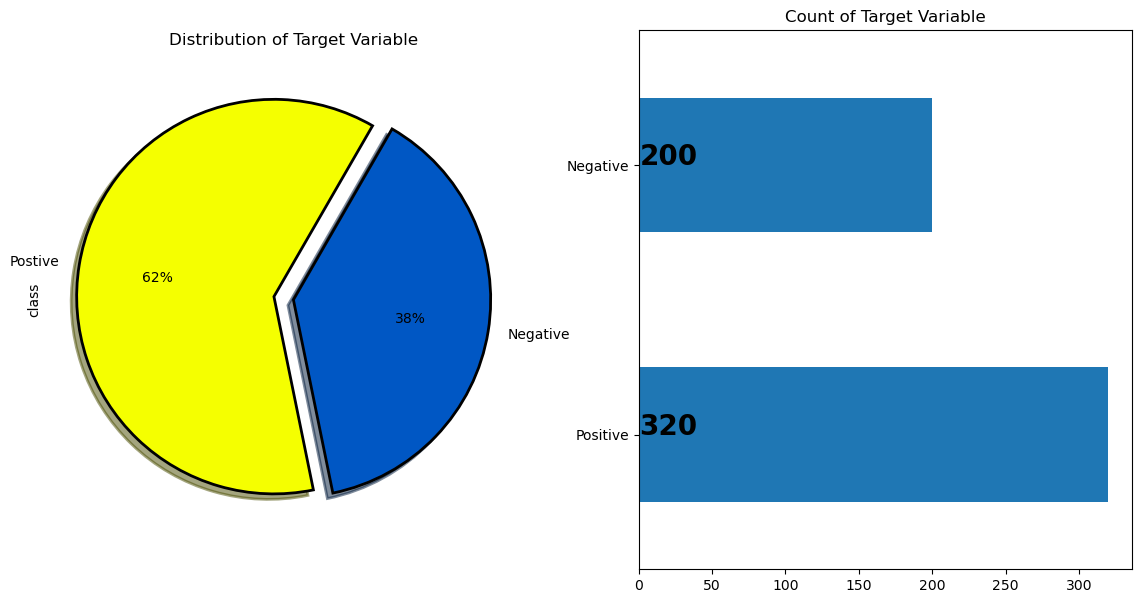

In [7]:
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),
startangle = 60,labels =["Postive","Negative"], 
wedgeprops={"linewidth":2,"edgecolor":"k"}, explode=[.1,0],shadow = True)

plt.title('Distribution of Target Variable')

plt.subplot(122)
ax = df["class"].value_counts().plot(kind='barh')

for i,j in enumerate(df['class'].value_counts().values):
    ax.text(.7,i,j,weight = "bold", fontsize =20)
    
plt.title("Count of Target Variable")
plt.show()

## Plotting barchart for Variable distributions

<Axes: xlabel='Gender', ylabel='count'>

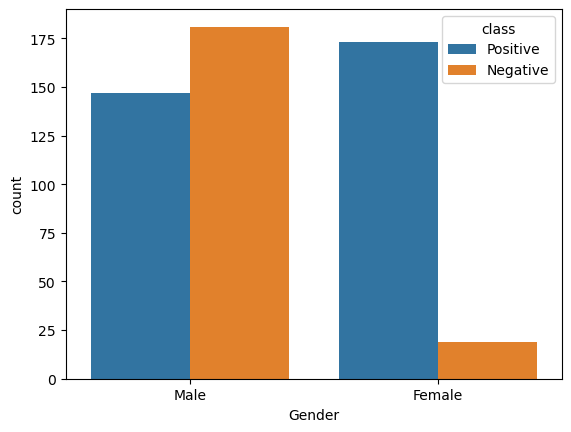

In [8]:
sns.countplot(x= df['Gender'], hue = df['class'], data = df)

## Plotting target variable + Gender variable

In [9]:
plot_criteria = ['Gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],
normalize = 'columns') * 100,2))

class,Negative,Positive
Gender,,
Female,9.5,54.06
Male,90.5,45.94


## Distribution of Polyuria (Osmostic diuresis, constant peeing) 

In [10]:
plot_criteria = ['Polyuria', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],
normalize = 'columns') * 100,3))

class,Negative,Positive
Polyuria,,
No,92.5,24.062
Yes,7.5,75.938


## Distribution of Polydipsia(dryness of mouth and throat)

In [11]:
plot_criteria = ['Polydipsia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],
normalize = 'columns') * 100,2))

class,Negative,Positive
Polydipsia,,
No,96.0,29.69
Yes,4.0,70.31


## Distribution of Sudden Weight loss with diabetes

In [12]:
plot_criteria = ['sudden weight loss', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],
normalize = 'columns') * 100,2))

class,Negative,Positive
sudden weight loss,,
No,85.5,41.25
Yes,14.5,58.75


## Distribution of Weakness with diabetes

In [13]:
plot_criteria = ['weakness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],
normalize = 'columns') * 100,2))

class,Negative,Positive
weakness,,
No,56.5,31.87
Yes,43.5,68.12


## Distribution of Polyphagia(Extreme hunger)

In [14]:
plot_criteria = ['Polyphagia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],
normalize = 'columns') * 100,2))

class,Negative,Positive
Polyphagia,,
No,76.0,40.94
Yes,24.0,59.06


## Distribution of Genital Thrush(Candidiasis) 

In [15]:
plot_criteria = ['Genital thrush', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],
normalize = 'columns') * 100,2))

class,Negative,Positive
Genital thrush,,
No,83.5,74.06
Yes,16.5,25.94


## Distribution of Visual Blurring

In [16]:
plot_criteria = ['visual blurring', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],
normalize = 'columns') * 100,2))

class,Negative,Positive
visual blurring,,
No,71.0,45.31
Yes,29.0,54.69


## Distribution of Increased Itching

In [17]:
plot_criteria = ['Itching', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],
normalize = 'columns') * 100,2))

class,Negative,Positive
Itching,,
No,50.5,51.88
Yes,49.5,48.12


## Distribution of Irritability

In [18]:
plot_criteria = ['Irritability', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],
normalize = 'columns') * 100,2))

class,Negative,Positive
Irritability,,
No,92.0,65.62
Yes,8.0,34.38


## Distribution of Partial Paresis (Weak muscle movement)

In [19]:
plot_criteria = ['muscle stiffness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],
normalize = 'columns') * 100,2))

class,Negative,Positive
muscle stiffness,,
No,70.0,57.81
Yes,30.0,42.19


## Distribution of Obesity

In [20]:
plot_criteria = ['Obesity', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],
normalize = 'columns') * 100,2))

class,Negative,Positive
Obesity,,
No,86.5,80.94
Yes,13.5,19.06


## Distribution of Alopecia(Hair loss)

In [21]:
plot_criteria = ['Alopecia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],
normalize = 'columns') * 100,2))

class,Negative,Positive
Alopecia,,
No,49.5,75.62
Yes,50.5,24.38


## Data pre-processing

### Changing string to numeric format

In [22]:
df['class'] = df['class'].apply(lambda x :0 if x== 'Negative' else 1)

In [23]:
X = df.drop(['class'] , axis =1)
y= df['class']

In [24]:
df['Age'].astype(np.int32)


0      40
1      58
2      41
3      45
4      60
       ..
515    39
516    48
517    58
518    32
519    42
Name: Age, Length: 520, dtype: int32

### Creating a list of object datatypes

In [25]:
objList = X.select_dtypes(include= 'object').columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    X[feat] = le.fit_transform(X[feat].astype(str))
    
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB
None


### Correlation between variables

In [26]:
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

Text(0.5, 0, 'Corelation')

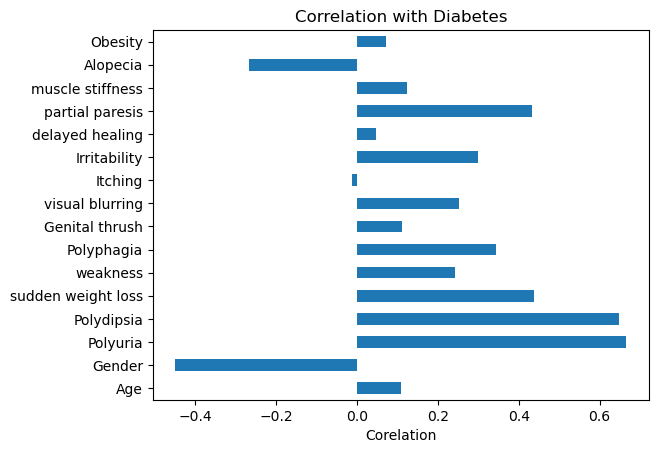

In [27]:
ax = X.corrwith(y).plot(kind = 'barh', title= "Correlation with Diabetes")
ax.set_xlabel('Corelation')


## Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=1234)

### Checking distribution of target variable in the train test split

In [29]:
print('Distribution of target variable in the training set')
print(y_train.value_counts())

print ('Distribution of target variable in the test set')
print(y_test.value_counts())

Distribution of target variable in the training set
1    256
0    160
Name: class, dtype: int64
Distribution of target variable in the test set
1    64
0    40
Name: class, dtype: int64


## Normalizing the data

In [30]:
minnax = MinMaxScaler()

X_train [['Age']] = minnax.fit_transform(X_train[['Age']])
X_test[['Age']] = minnax.transform(X_test[['Age']])

X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
246,0.405405,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
274,0.554054,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
424,0.364865,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0
316,0.527027,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
159,0.297297,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0


## Model Building

### Logistic Regression (Comparative model for binary tasks)

In [31]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(random_state = 0, penalty = 'l2')
logi.fit(X_train, y_train)

LogisticRegression(random_state=0)

### 10 fold cross validation

In [32]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=10,  shuffle=True)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_logi.mean()

0.9086527293844366

In [33]:
y_predict_logi = logi.predict(X_test)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.971154,0.908653,0.984127,0.96875,0.976378,0.971875


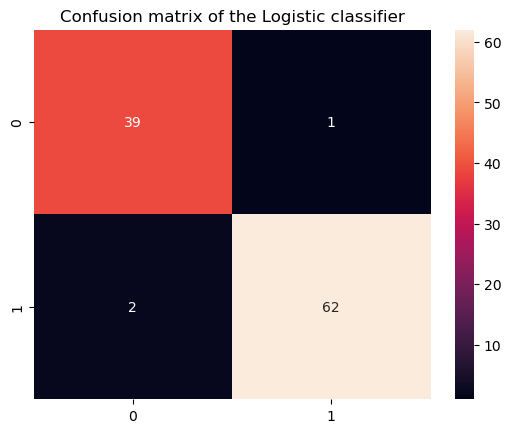

In [34]:
cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

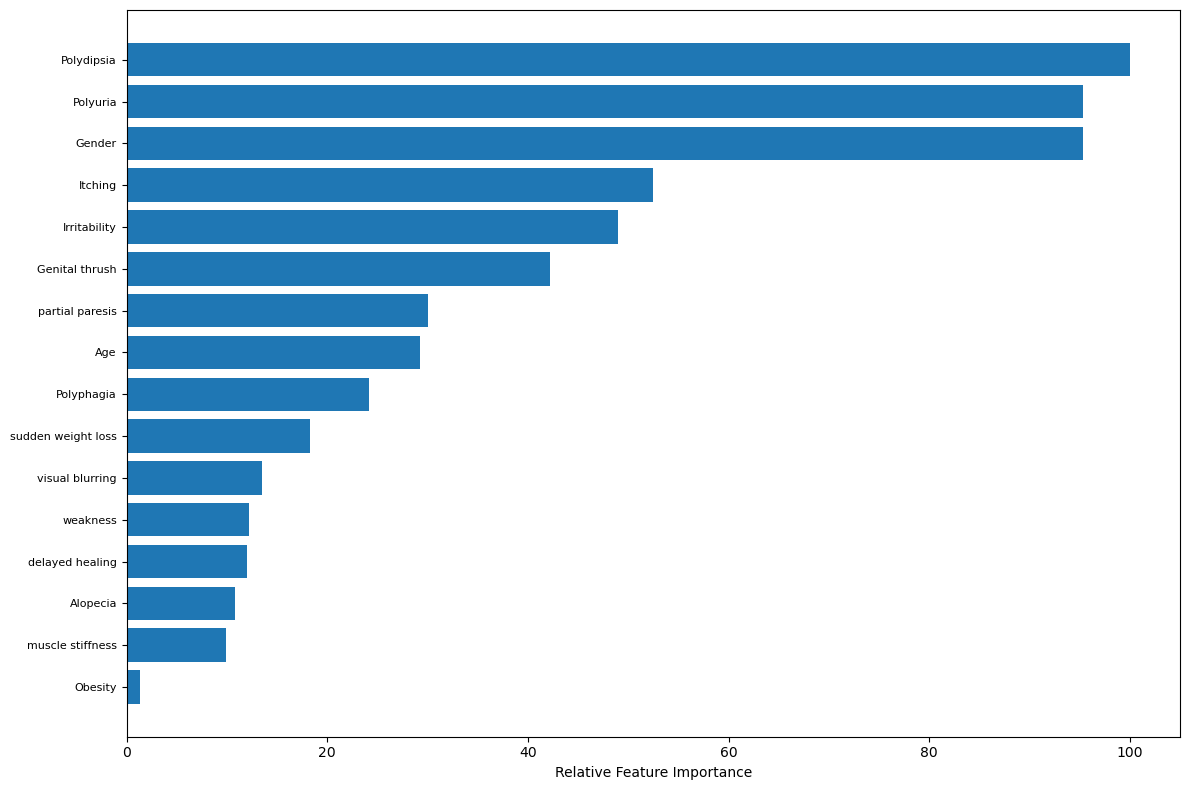

In [35]:
#plotting feature importance
feature_importance = abs(logi.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .3

featfig = plt.figure(figsize=(12,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

## Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

### Cross Validation

In [37]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle = True)
scoring = 'accuracy'
acc_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_rf.mean()

0.9686991869918697

In [38]:
y_predict_r = rf.predict(X_test)
acc = accuracy_score(y_test, y_predict_r)
roc = roc_auc_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)


model_results = pd.DataFrame([['Random Forest (Untuned)',acc, acc_rf.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.971154,0.908653,0.984127,0.96875,0.976378,0.971875
1,Random Forest (Untuned),0.980769,0.968699,1.000000,0.96875,0.984127,0.984375


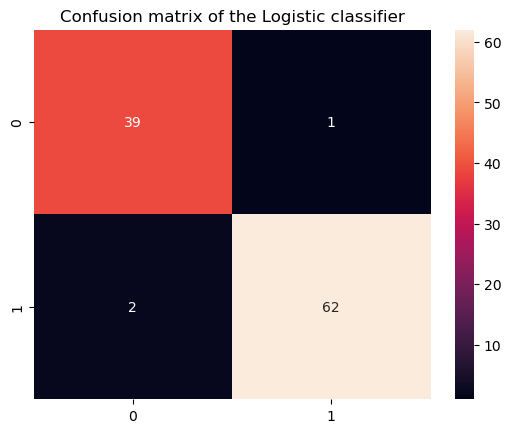

In [39]:
cm_r = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

<Axes: >

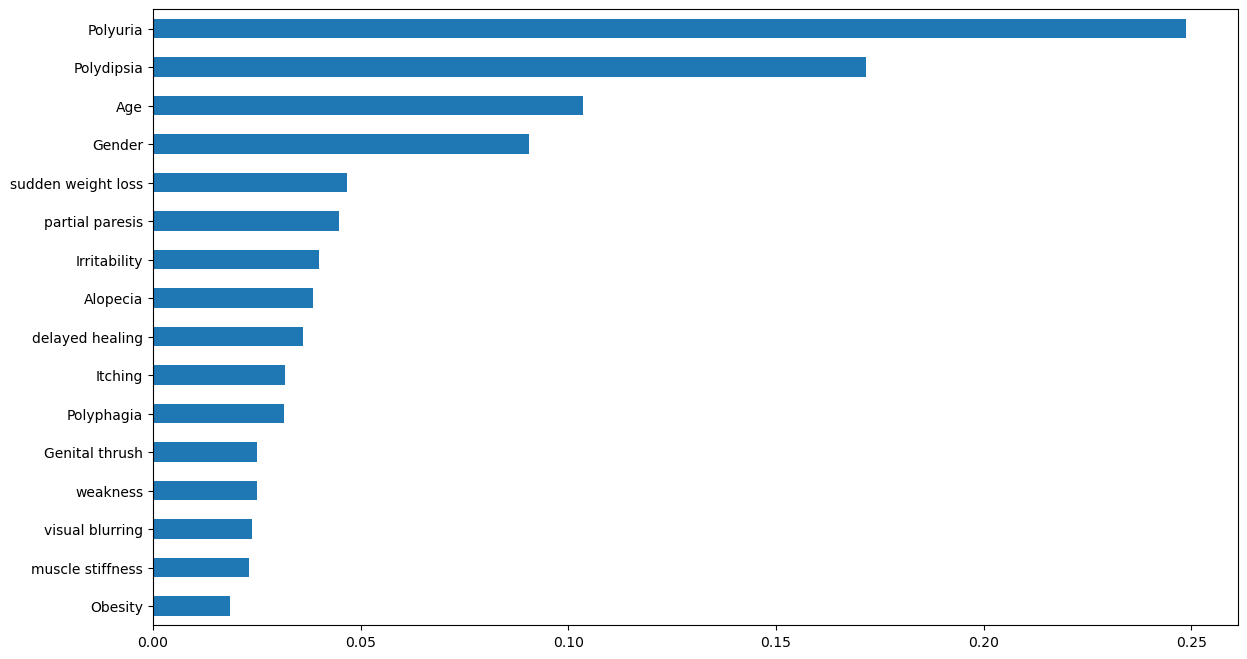

In [40]:
feat_importances = pd.Series(rf.feature_importances_, index = X_train.columns)
feat_importances.sort_values().plot(kind = 'barh', figsize=(14,8))

## ROC Curve

In [41]:
from sklearn import metrics


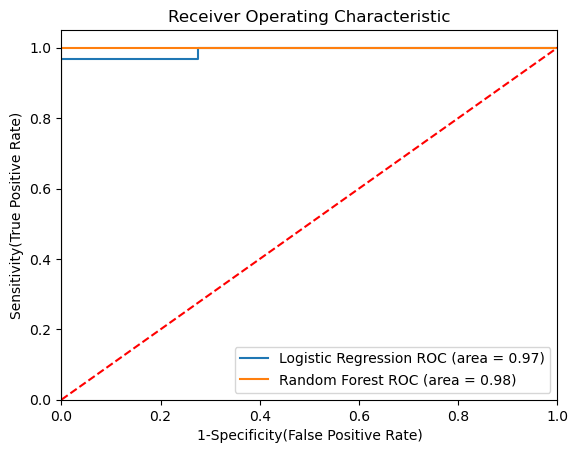

In [42]:

plt.figure()

models = [
{
    'label':"Logistic Regression",
    'model' : LogisticRegression(random_state=0, penalty='l2'),   
},

    {
    'label':"Random Forest",
    'model' : RandomForestClassifier(n_estimators=100, criterion='gini', random_state=47),
},    
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test, model.predict(X_test))
    plt.plot(fpr,tpr,label = '%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
